In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('time_series_covid19_deaths_US.csv')

states= []
x=0
for state in confirmed.Province_State.unique():
    if(state=='Diamond Princess' ):
         x=3
    elif(state=='Puerto Rico'):
        x=2
    elif(state=='District of Columbia'):
        x
    elif( state=='Northern Mariana Islands'):
        x=3
    elif(state=='American Samoa'):
        x
    elif(state=='Virgin Islands'):
        x=4
    elif(state=='Grand Princess'):
        x
    elif(state=='Guam'):
        x=6
    else:
        states.append(state)

confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2580,2597,2617,2634,2661,2686,2704,2716,2735,2751
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,8038,8131,8199,8269,8376,8473,8576,8603,8733,8820
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1151,1157,1160,1161,1167,1170,1170,1171,1173,1175
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1024,1036,1136,1142,1157,1162,1170,1173,1179,1188
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2704,2735,2754,2763,2822,2855,2879,2888,2922,2946


In [3]:
def get_pop100k(state, county):
    pop_df = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')
    pop_df= pop_df.loc[pop_df['Country_Region']=='US']
    pop_df.rename(columns ={'Admin2':'County'} , inplace = True)
    pop_df= pop_df.loc[pop_df['Province_State']== state]
    pop_df = pop_df.loc[pop_df['County']==county]
    population = pop_df['Population'].values
    pop100k = population / 100000
    return pop100k


In [4]:
def make_state_df(df, state):
    state_df =df.loc[df['Province_State']==state]
    state_df.rename(columns={'Admin2':'County'}, inplace=True)
    
    return state_df  
   
ny_confirm = make_state_df(confirmed,'New York')
ny_death = make_state_df(deaths, 'New York')


In [5]:
def make_county_confirmed (state_df, county):
    county_df =state_df.loc[state_df['County']==county]
    county_df= county_df.iloc[:,11:]
    
    return county_df

def make_county_deaths (state_deaths, county):
    county_df =state_deaths.loc[state_deaths['County']==county]
    county_df= county_df.iloc[:,12:]
    

   
    #population =county_pop['Population'].value
    county_df
    # county_pop, population
    return county_df
def county_population(state_deaths, county):
    county_df =state_deaths.loc[state_deaths['County']==county]
    county_pop= county_df['Population'].values   
    return county_pop
erie_df= make_county_confirmed(ny_confirm, 'Erie')
erie_df
erie_dd = make_county_deaths(ny_death , 'Erie')
erie_pop = county_population(ny_death, 'Erie')


In [6]:
def make_new_cases(county_df):
    county_values = county_df.T.values
    
    ei = erie_df.T.index.values
    ei
    x=0
    new_cases=[]
    for case in county_values:
        if(x==0):
            new_cases.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases)
            nc= case - current
            if(case > current):
                    
                    new_cases.append(nc)
            else:
                new_cases.append(0)
           
            y=y+1
    return new_cases
    
erie_new_cases = make_new_cases(erie_df)        
erie_new_deaths  = make_new_cases(erie_dd) 
#print(len(erie_new_deaths), len(erie_new_cases))         


In [8]:
def make_rolling_average(df):    
    days_1ago= df['New_Cases'].shift(1).fillna(method='backfill')
    days_2ago = df['New_Cases'].shift(2).fillna(method='backfill')
    days_3ago = df['New_Cases'].shift(3).fillna(method='backfill')
    days_4ago = df['New_Cases'].shift(4).fillna(method='backfill')
    days_5ago = df['New_Cases'].shift(5).fillna(method='backfill')
    today = df['New_Cases']

    df['Average'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    return df['Average']


In [9]:
def make_rolling_average(df):    
    days_1ago= df['New_Cases'].shift(1).fillna(method='backfill')
    days_2ago = df['New_Cases'].shift(2).fillna(method='backfill')
    days_3ago = df['New_Cases'].shift(3).fillna(method='backfill')
    days_4ago = df['New_Cases'].shift(4).fillna(method='backfill')
    days_5ago = df['New_Cases'].shift(5).fillna(method='backfill')
    today = df['New_Cases']

    df['Average'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    return df['Average']


In [10]:

def join_tables(confirmed_df, death_df, daily_confirms, daily_deaths, county_pop):
    confirmed_df.index.name ='Confirmed'
    death_df.index.name = 'Deaths'
    
    c_trans = confirmed_df.T
    
    d_trans = death_df.T
   
    c_trans.index.name = 'Date'
    d_trans.index.name = 'Date'
   
   
    joined_df = c_trans.join(d_trans,lsuffix='Date', rsuffix='Date')
    joined_df['Confirmed']= c_trans.values
    joined_df['Deaths']= d_trans.values
    joined_df['New_Cases']=daily_confirms
    joined_df['New_Deaths']= daily_deaths
    joined_df['Population_Affected']=  joined_df['Confirmed'] / county_pop
    joined_df['Average']= make_rolling_average(joined_df)
    #joined_df.drop(['1914Date'],axis=1, inplace=True)
    onehundredk = float(county_pop / 100000)
    
    joined_df['Ave_per_100k'] = joined_df['Average']/ onehundredk
    
    return joined_df
erie_join= pd.DataFrame()
erie_join = join_tables(erie_df, erie_dd, erie_new_cases, erie_new_deaths, erie_pop)
erie_join.tail()

,1914Date,1914Date,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k
Date,,,,,,,,,
11/25/20,22558,764,22558,764,[685],[2],0.024554,[491.0],[53.44496909770524]
11/26/20,23071,779,23071,779,[513],[15],0.025113,[503.4],[54.79469947817682]
11/27/20,23933,785,23933,785,[862],[6],0.026051,[571.6],[62.2182165707705]
11/28/20,24440,791,24440,791,[507],[6],0.026603,[573.6],[62.435915019233654]
11/29/20,24942,805,24942,805,[502],[14],0.027149,[613.8],[66.81165383334312]


In [11]:
def id_columns (join_df, County , State):
    join_df['County']= County
    join_df['State'] = State 
    join_df['New_Cases']= join_df['New_Cases'].astype(int)
    join_df['New_Deaths'] = join_df['New_Deaths'].astype(int)
    join_df['Population_Affected']= join_df['Population_Affected'].round(5)
    join_df['Average'] = join_df['Average'].astype(int)
    join_df['Ave_per_100k']= join_df['Ave_per_100k'].astype(int)
    
    join_df['State']= join_df['State'].astype(str)
    join_df['County']= join_df['County'].astype(str)
    return join_df
erie = id_columns( erie_join , 'Erie' , 'New York')
erie.tail()

,1914Date,1914Date,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,County,State
Date,,,,,,,,,,,
11/25/20,22558,764,22558,764,685,2,0.02455,491,53,Erie,New York
11/26/20,23071,779,23071,779,513,15,0.02511,503,54,Erie,New York
11/27/20,23933,785,23933,785,862,6,0.02605,571,62,Erie,New York
11/28/20,24440,791,24440,791,507,6,0.02660,573,62,Erie,New York
11/29/20,24942,805,24942,805,502,14,0.02715,613,66,Erie,New York


In [12]:
def one_shot(County, State):
    state_confirmed= make_state_df(confirmed, State)
    state_deaths = make_state_df(deaths, State)
    county_df = make_county_confirmed(state_confirmed, County)
    county_dd = make_county_deaths(state_deaths, County)
    daily_confirms = make_new_cases(county_df)
    daily_deaths = make_new_cases (county_dd)
    county_pop = county_population(state_deaths, County)
    join_df = join_tables(county_df, county_dd, daily_confirms, daily_deaths, county_pop)
    df = id_columns(join_df, County, State)
    return df 


In [13]:
erie =one_shot('Erie', 'New York')

In [14]:
erie.tail()

,1914Date,1914Date,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,County,State
Date,,,,,,,,,,,
11/25/20,22558,764,22558,764,685,2,0.02455,491,53,Erie,New York
11/26/20,23071,779,23071,779,513,15,0.02511,503,54,Erie,New York
11/27/20,23933,785,23933,785,862,6,0.02605,571,62,Erie,New York
11/28/20,24440,791,24440,791,507,6,0.02660,573,62,Erie,New York
11/29/20,24942,805,24942,805,502,14,0.02715,613,66,Erie,New York


<Figure size 576x432 with 0 Axes>

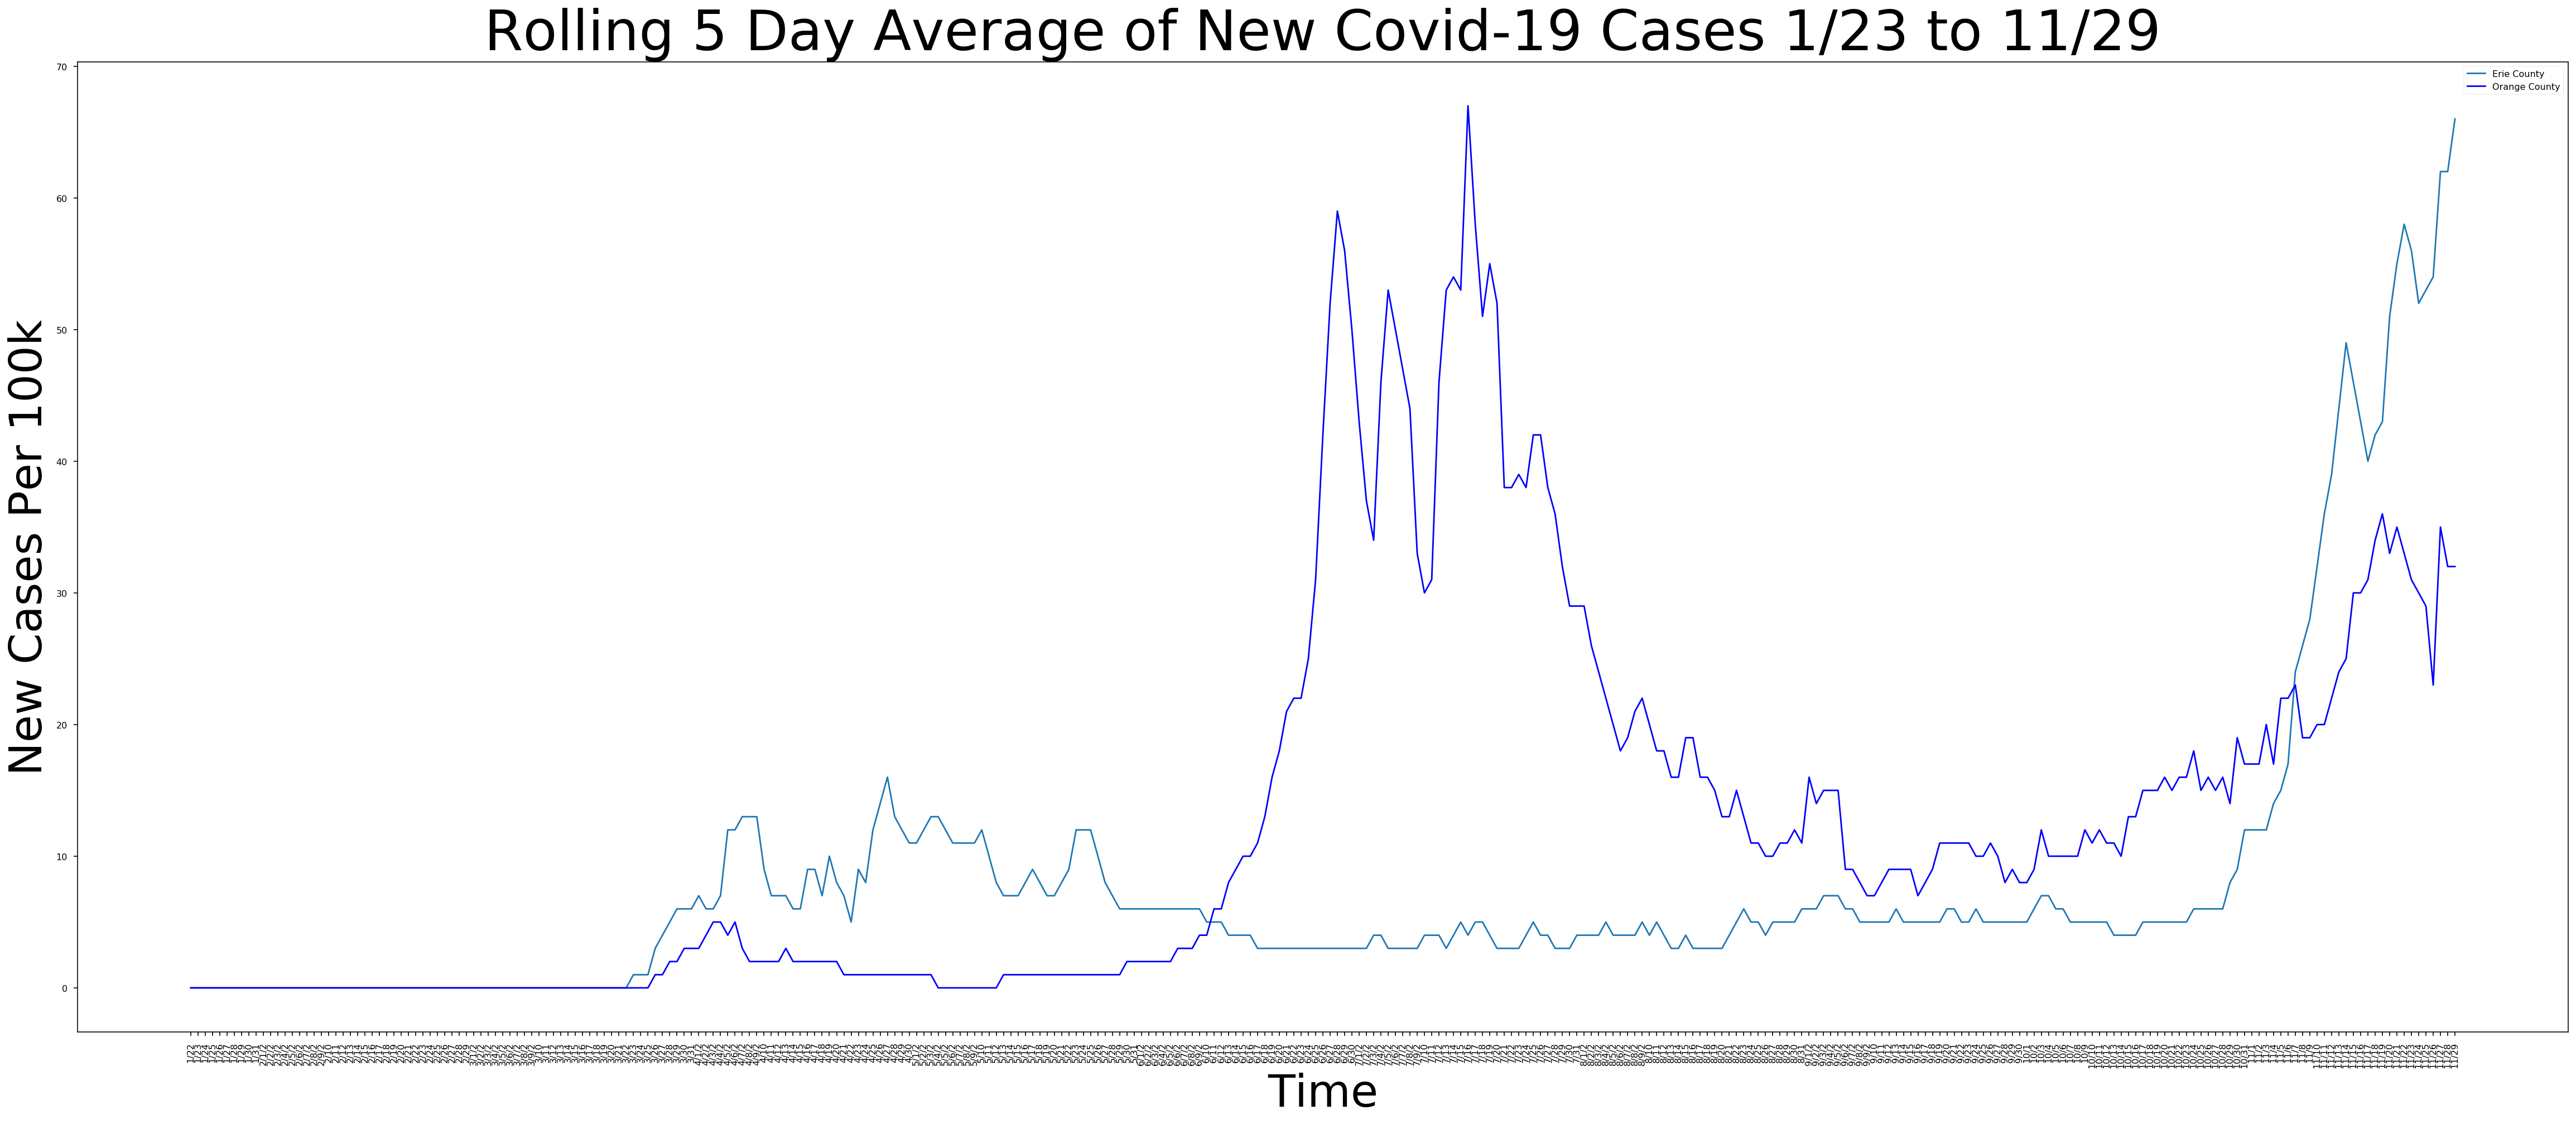

In [15]:
def  graph_rolling_average (df,df1_Name,  df2, df2_Name):
    date_series = df.index
    date_averages = df['Ave_per_100k'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    
    date_series2 = df2.index
    date_averages2 = df2['Ave_per_100k'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]
            date_values.append(date)
    
    
    fig = plt.figure(figsize=(8,6))
    plt.style.use('seaborn-paper')
    plt.figure(figsize=(40,16))
    plt.plot(date_values, date_averages, '-', label=df1_Name)
    plt.plot(date_values, date_averages2, 'b', label = df2_Name)

    plt.ylabel('New Cases Per 100k',  fontsize=40)
    plt.xlabel('Time', fontsize=40)
    plt.xticks(rotation=90)
    x =len(date_values)-1
    y = str(date_values[x])
    
    title ='Rolling 5 Day Average of New Covid-19 Cases 1/23 to ' + y
    plt.title(title, fontsize=50)
    plt.legend()
    plt.show()
    return
df = one_shot('Erie', 'New York')
df2 = one_shot('Orange' , 'Florida')
graph_rolling_average(df,'Erie County', df2, 'Orange County')


Erie County, New York 25 days prior to 11/29


<Figure size 576x432 with 0 Axes>

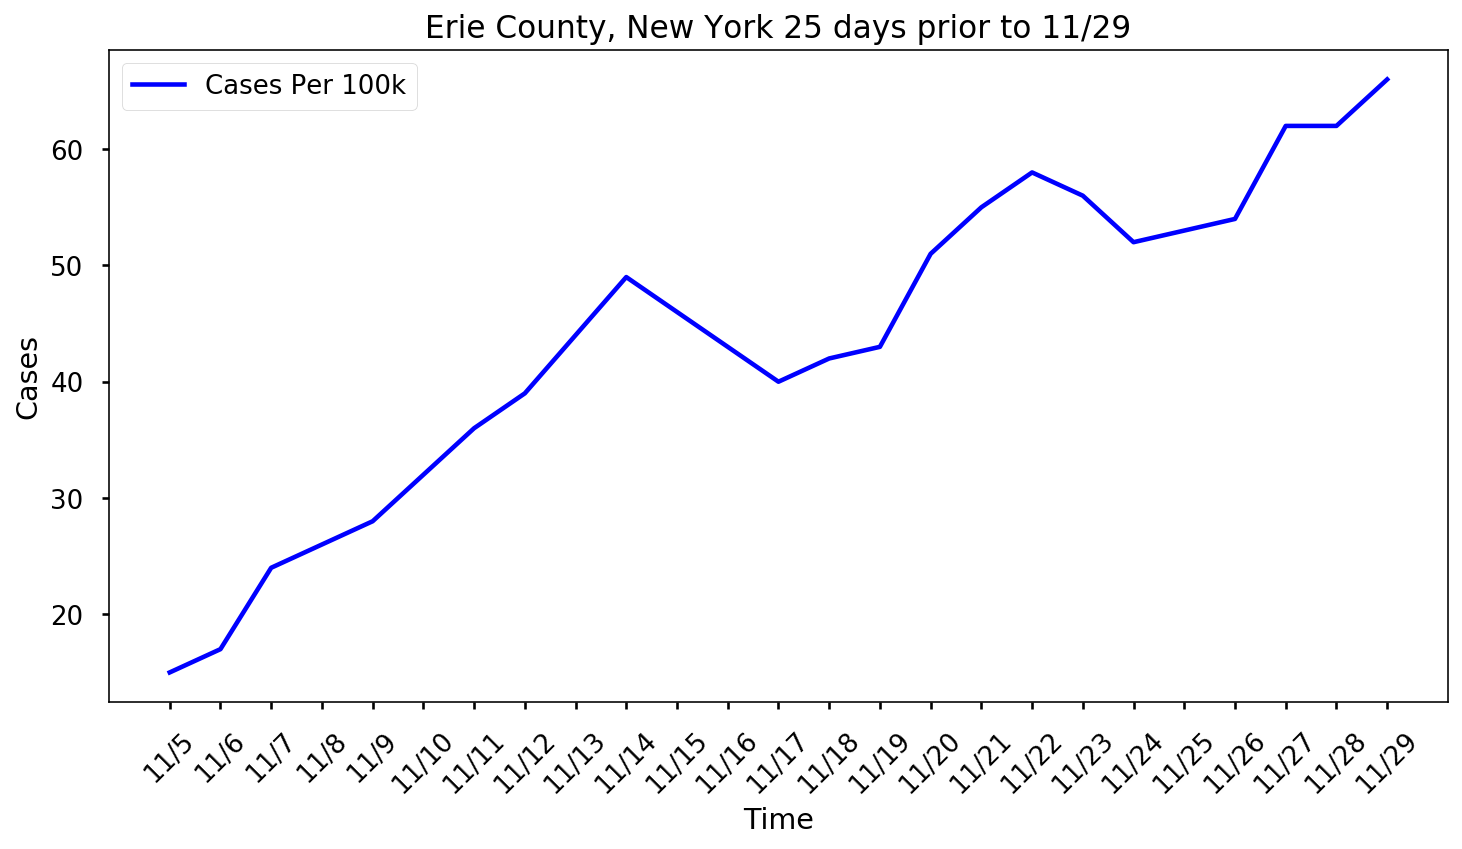

In [18]:

def graph_n_days_ago(County, State , n):
    df = one_shot(County, State)
    N= df.shape[0] - n
    df= df.iloc[N:, :]
    
    
    date_series = df.index
    date_averages = df['Ave_per_100k'].values

    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    #print(date_values)
    x =len(date_values)-1
    plt.style.use('seaborn-talk')
    fig = plt.figure(figsize=(8,6))
    y = str(date_values[x])
    n = str(n)
    title = County + " County, " + State +" "+ n +" days prior to " + y
    print(title)

    plt.figure(figsize=(12,6))
    plt.plot(date_values, date_averages, 'b', label='Cases Per 100k')

    plt.ylabel('Cases')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()
    return
graph_n_days_ago('Erie','New York' , 25)

Erie County vs Los Angeles County  21 days prior to 11/29


<Figure size 576x432 with 0 Axes>

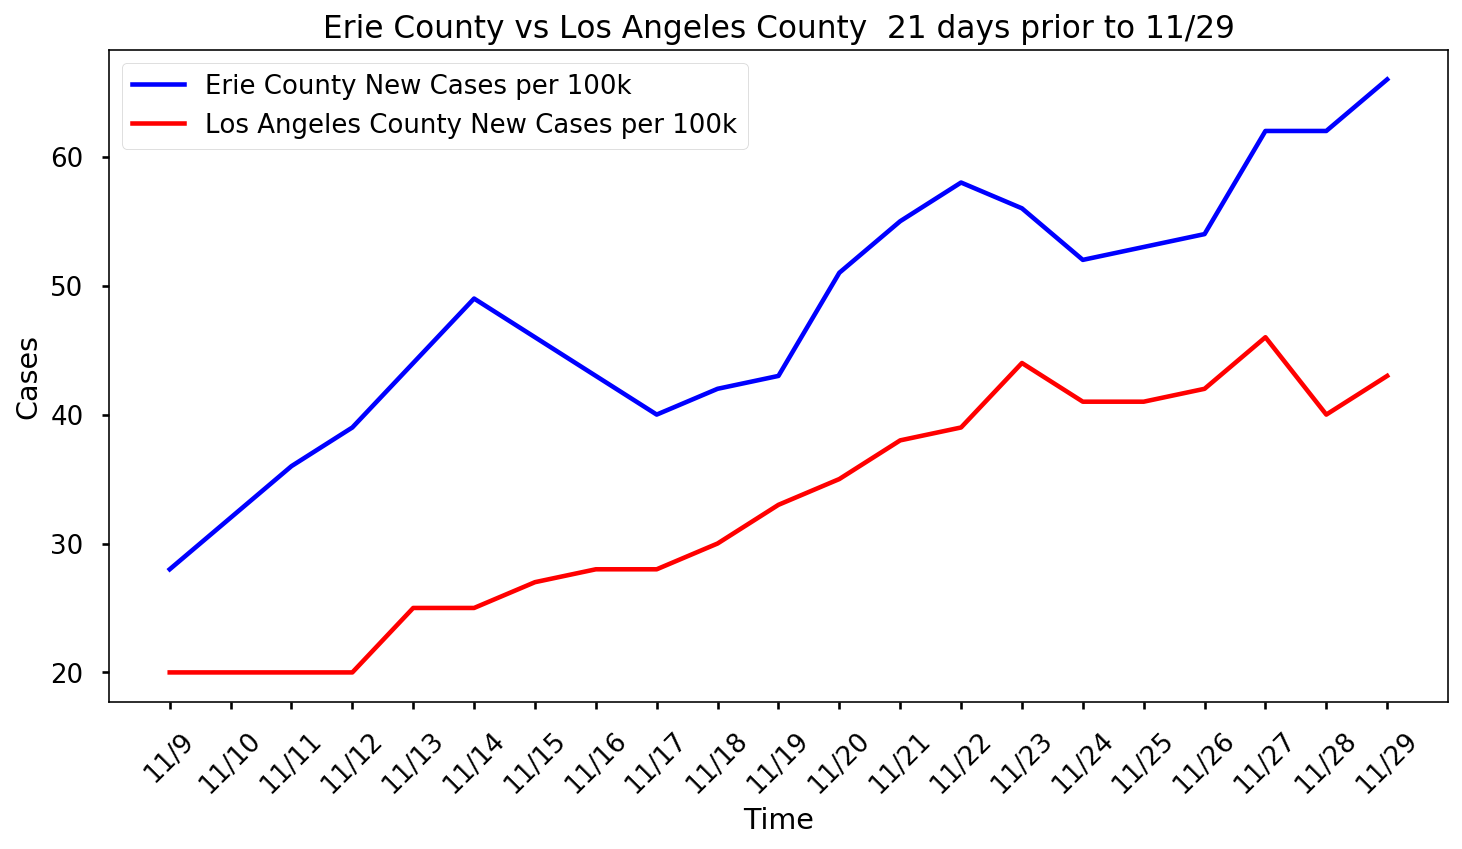

In [17]:
def Compare_Counties_n_days_ago(County, State , County2, State2, n):
    df = one_shot(County, State)
    df2 = one_shot(County2, State2)
    N= df.shape[0] - n
    N= df2.shape[0] - n
    
    df= df.iloc[N:, :]   
    date_series = df.index
    date_averages = df['Ave_per_100k'].values

    
   
    df2= df2.iloc[N:, :]   
    date_series2 = df2.index
    date_averages2 = df2['Ave_per_100k'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    date_values2=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values2.append(date)
        else:
            date= dates[0:5]

            date_values2.append(date)
    #print(date_values)
    x =len(date_values)-1
    plt.style.use('seaborn-talk')
    fig = plt.figure(figsize=(8,6))
    y = str(date_values[x])
    n = str(n)
    title = County + " County vs " +County2 +" County  "+ n +" days prior to " + y
    print(title)
    label1 = County + " County New Cases per 100k"
    label2 = County2 + " County New Cases per 100k"
    plt.figure(figsize=(12,6))
    plt.plot(date_values, date_averages, 'b', label=label1)
    plt.plot(date_values2, date_averages2, 'r', label=label2)

    plt.ylabel('Cases')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()
    return
Compare_Counties_n_days_ago("Erie", "New York" , "Los Angeles", "California", 21)

Erie County vs New York County  21 days prior to 11/29


<Figure size 576x432 with 0 Axes>

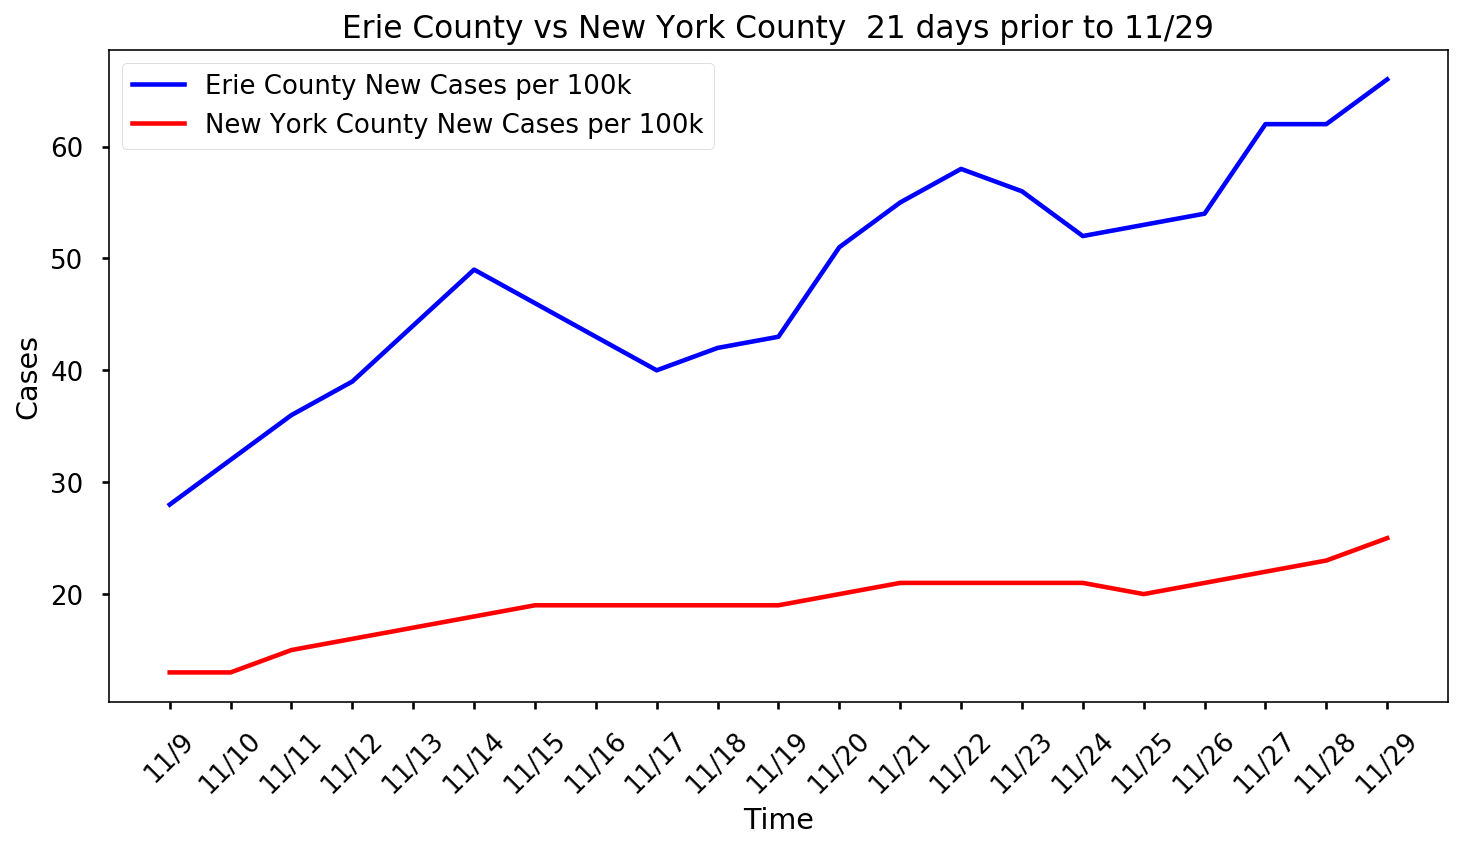

In [19]:
Compare_Counties_n_days_ago("Erie", "New York" , "New York", "New York", 21)

In [20]:
def make_state_stats(State, confirmed, deaths):
    nyc = make_state_df(confirmed, State)
    #county_names = nyc['County'].unique()
    #print(county_names)
    nyd = make_state_df(deaths, State)

    population = nyd.iloc[:,11:12].sum()
    population = int(population)
    nyc = nyc.iloc[:,23:]
    nyd= nyd.iloc[:,24:]
 
    nyc_columns = nyc.columns.unique()
    

    nyd_columns =  nyd.columns.unique()
    
    state_daily = []
    s_daily_100k= []
    for column in nyc_columns:
        daily_cases = sum(nyc[column].values)
        state_daily.append(daily_cases)
        daily_100k = daily_cases / (population /100000)
        s_daily_100k.append(int(daily_100k))
    state_death = []
    s_death_100k =[]
    for column in nyd_columns:
        daily_deaths = sum(nyd[column].values)
        state_death.append(daily_deaths)
        death_100k = daily_deaths / (population /100000)
        s_death_100k.append(int(death_100k))


    x=0
    new_cases=[]
    for case in state_daily:
        if(x==0):
            new_cases.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases)
            nc= case - current
            if(case > current):
                    
                    new_cases.append(nc)
            else:
                new_cases.append(0)
           
            y=y+1

    x=0
    new_deaths=[]
    for case in state_death:
        if(x==0):
            new_deaths.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_deaths)
            nc= case - current
            if(case > current):
                    
                    new_deaths.append(nc)
            else:
                new_deaths.append(0)
           
            y=y+1

    
    
    
    
    x=0
    new_cases100k=[]
    for case in state_daily:
        case= case / (population / 100000)
        if(x==0):
            new_cases100k.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases100k)
            nc= case - current
            if(case > current):
                    
                    new_cases100k.append(int(nc))
            else:
                new_cases100k.append(0)
           
            y=y+1

    x=0
    new_100kdeaths=[]
    for case in state_death:
        case= case / (population / 100000)
        if(x==0):
            new_100kdeaths.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_100kdeaths)
            nc= case - current
            if(case > current):
                    
                    new_100kdeaths.append(nc.round(3))
            else:
                new_100kdeaths.append(0)
           
            y=y+1

        
    state_df = pd.DataFrame()
    state_df['Total_Cases'] = state_daily
    state_df['Total_Deaths'] = state_death
    state_df['Cases_per_100k'] =s_daily_100k
    state_df['Deaths_per_100k'] = s_death_100k
    state_df['New_Cases'] = new_cases
    state_df['New_Deaths']= new_deaths
    state_df['New_Cases_per_100k']= new_cases100k
    state_df['New_Deaths_per_100k']= new_100kdeaths
    
       
    days_1ago= state_df['New_Cases'].shift(1).fillna(method='backfill')
    days_2ago = state_df['New_Cases'].shift(2).fillna(method='backfill')
    days_3ago = state_df['New_Cases'].shift(3).fillna(method='backfill')
    days_4ago = state_df['New_Cases'].shift(4).fillna(method='backfill')
    days_5ago = state_df['New_Cases'].shift(5).fillna(method='backfill')
    today = state_df['New_Cases']
    state_df['Ave_NC'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    
    days_1ago= state_df['New_Cases_per_100k'].shift(1).fillna(method='backfill')
    days_2ago = state_df['New_Cases_per_100k'].shift(2).fillna(method='backfill')
    days_3ago = state_df['New_Cases_per_100k'].shift(3).fillna(method='backfill')
    days_4ago = state_df['New_Cases_per_100k'].shift(4).fillna(method='backfill')
    days_5ago = state_df['New_Cases_per_100k'].shift(5).fillna(method='backfill')
    today = state_df['New_Cases_per_100k']
    state_df['Ave_per_100k'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    
    
    state_df.index = nyc_columns
    state_df.tail()
    return state_df
ny= make_state_stats('New York', confirmed, deaths)
ny.head()
fl = make_state_stats('Florida', confirmed, deaths)
ny.tail()

,Total_Cases,Total_Deaths,Cases_per_100k,Deaths_per_100k,New_Cases,New_Deaths,New_Cases_per_100k,New_Deaths_per_100k,Ave_NC,Ave_per_100k
11/25/20,613266,34388,3152,176,6265,26,32.0,0.134,5683.2,29.2
11/26/20,620199,34443,3188,177,6933,55,36.0,0.282,5875.2,30.2
11/27/20,628375,34477,3230,177,8176,34,42.0,0.175,6432.2,33.2
11/28/20,634438,34514,3261,177,6063,37,31.0,0.190,6463.6,33.2
11/29/20,641161,34561,3295,177,6723,47,34.0,0.242,6832.0,35.0
